In [7]:
import os
import json
import twitter

In [96]:
import pickle # to back up data

In [5]:
scriptdir = '/home/r/github/twitter-loader/'
scriptdir

'/home/r/github/twitter-loader/'

In [62]:
{ k: v[0:3] + "..." + v[-3:] for k, v in keycodes.items() }

{'access_token': '193...smN',
 'access_token_secret': 'zHf...7fh',
 'api_key': 'IF0...jso',
 'api_secret': 'hIz...LE9'}

In [10]:
with open(os.path.join(scriptdir, "secrets.json"), "rt") as f:
    keycodes = json.loads(f.read())
t = twitter.Twitter(auth=twitter.OAuth(keycodes["access_token"],
                                       keycodes["access_token_secret"],
                                       keycodes["api_key"],
                                       keycodes["api_secret"]))

In [31]:
s200 = t.search.tweets(q="$UPZS", count=200)

In [42]:
s200goog2 = t.search.tweets(q="$GOOG", count=200, max_id=727601105299865602)

In [46]:
s200goog = [s200goog, s200goog2]

In [48]:
g = s200goog2

In [191]:
s200t = []
g = t.search.tweets(q="$UPZS", count=200, lang='en')
s200t.append(g)

while len(g['statuses']) > 0:
    min_id = min([x['id'] for x in g['statuses']]) - 1
    g = t.search.tweets(q="$UPZS", count=200, lang='en', max_id=min_id)
    s200t.append(g)

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=200&lang=en&max_id=727587076053475328&oauth_consumer_key=IF0QJ85SflFlX2OhYp9FLJjso&oauth_nonce=5190830311728433750&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1462490348&oauth_token=19373880-aatzB2R9i9nAKdZ7PL9vc4ptCcN8SKqTxikYZ6smN&oauth_version=1.0&q=%24UPZS&oauth_signature=fUYJ1TlPnUt7hctNql%2Fgs2zo7%2Bk%3D)
details: {'errors': [{'code': 88, 'message': 'Rate limit exceeded'}]}

In [193]:
s200t = [y for x in s200t for y in x['statuses']]
len(s200t)

18000

In [206]:
[(x['retweet_count'], x['id']) for x in s200t if "@SCA" in x['text']]

[(951, 728039384008695808),
 (951, 728039165363822592),
 (951, 728038888283983872),
 (951, 728038566010441728),
 (951, 728038540014174208),
 (951, 728038479905492993),
 (951, 728038371516276737),
 (951, 728038367531651072),
 (951, 728038353275228160),
 (951, 728038352394428422),
 (951, 728038341036277760),
 (951, 728038332219850753),
 (951, 728038331125252097),
 (951, 728038331045453824),
 (951, 728038325840322560),
 (951, 728038321360769024),
 (951, 728038311919529984),
 (951, 728038310292033536),
 (951, 728038300536086528),
 (951, 728038299441356802),
 (951, 728038257104052225),
 (951, 728038254268719104),
 (951, 728038248749010944),
 (951, 728038244466757632),
 (951, 728038231812521985),
 (951, 728038229354553345),
 (951, 728038218793418752),
 (951, 728038215018373120),
 (951, 728038213537828865),
 (951, 728038184911667201),
 (951, 728038184081235968),
 (951, 728038163696902148),
 (951, 728038148115062784),
 (951, 728038145472667648),
 (951, 728038141760659458),
 (951, 7280381306626

In [198]:
len(Out[195])

1919

In [98]:
s200s[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed May 04 23:49:51 +0000 2016',
 'entities': {'hashtags': [{'indices': [69, 76], 'text': 'signup'},
   {'indices': [81, 88], 'text': 'alerts'},
   {'indices': [98, 106], 'text': 'company'},
   {'indices': [109, 112], 'text': 'RT'}],
  'symbols': [{'indices': [15, 20], 'text': 'LLLI'},
   {'indices': [21, 26], 'text': 'UPZS'},
   {'indices': [27, 32], 'text': 'MFST'},
   {'indices': [33, 38], 'text': 'CYCA'},
   {'indices': [39, 44], 'text': 'GOHE'},
   {'indices': [45, 50], 'text': 'TXHD'},
   {'indices': [51, 56], 'text': 'PKGM'},
   {'indices': [57, 62], 'text': 'NGCG'},
   {'indices': [63, 68], 'text': 'GRCU'}],
  'urls': [{'display_url': 'ow.ly/4mOfGJ',
    'expanded_url': 'http://ow.ly/4mOfGJ',
    'indices': [139, 140],
    'url': 'https://t.co/wIZ74z2rEq'}],
  'user_mentions': [{'id': 24172445,
    'id_str': '24172445',
    'indices': [3, 13],
    'name': 'Stockzeus',
    'screen_name': 'stockzeus'},
   {'id': 2878853

In [93]:
[(x['user']['screen_name'], x['user']['location'], x['user']['description'],
  x['created_at'], x['retweet_count'], x['text']) for x in s200[-2]['statuses']]

[('JessieRollesto1',
  'Columbia',
  'Person who reads. Thinker. A Wonderful human being. Brand-new solutions. Philosophy. Slow to utter a word',
  'Wed May 04 03:54:20 +0000 2016',
  2413,
  'RT @fdgbsug: Another meeting today w/Girl Scouts of America about co branding Jose Madrid Salsa! The #Healthy #Fundraiser $UPZS https://t.c…'),
 ('margie_philips',
  'Phoenix',
  'Book lover. Thinker. A Really good person. Fresh solutions. Standards. Slower to speak out',
  'Wed May 04 03:54:20 +0000 2016',
  2413,
  'RT @fdgbsug: Another meeting today w/Girl Scouts of America about co branding Jose Madrid Salsa! The #Healthy #Fundraiser $UPZS https://t.c…'),
 ('MarionRudhall',
  'Dallas',
  'Ebook reader. Thinker. A Really good person. Unique creative ideas. Philosophy. Slow to utter a word',
  'Wed May 04 03:54:19 +0000 2016',
  2413,
  'RT @fdgbsug: Another meeting today w/Girl Scouts of America about co branding Jose Madrid Salsa! The #Healthy #Fundraiser $UPZS https://t.c…'),
 ('jade_mowfurt

In [94]:
s200s = [y for x in s200 for y in x['statuses']]

In [99]:
import scipy.cluster

In [100]:
import scipy.cluster.hierarchy

In [163]:
def words_in_common_sets(w1, w2, lenw1, lenw2):
    total_words = lenw1 + lenw2
    if total_words == 0:
        return 1.0
    unique_words = len(set([w for w in w1] + [w for w in w2]))
    common_words = total_words - unique_words
    return (2.0 * common_words / total_words)


In [102]:
import numpy

In [104]:
dist = numpy.zeros(shape=[len(s200s), len(s200s)], dtype=numpy.int8)
for i in range(len(s200s)):
    w1 = set([w for w in s200s[i]['text']])
    lenw1 = len(w1)
    for j in range(i, len(s200s)):
        w2 = set([w for w in s200s[j]['text']])
        lenw2 = len(w2)
        dist[i, j] = dist[j, i] = int(100 * (1.0 - words_in_common_sets(w1, w2, lenw1, lenw2)))

dist_pdist = numpy.zeros(shape=[int(len(s200s) * (len(s200s) - 1) / 2)], dtype=numpy.int8)
k = 0
for i in range(len(s200s)):
    for j in range(i+1, len(s200s)):
        dist_pdist[k] = dist[i, j]
        k += 1

In [115]:
k

42361410

In [112]:
int(len(s200s) * (len(s200s) - 1) / 2)

42361410

In [105]:
import datetime

In [106]:
datetime.datetime.now()

datetime.datetime(2016, 5, 4, 23, 50, 16, 502458)

In [116]:
linkage = scipy.cluster.hierarchy.linkage(dist_pdist)

In [118]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

([array([  1.84000000e+03,   1.84100000e+03,   1.84100000e+03,
           1.83400000e+03,   1.84100000e+03,   0.00000000e+00,
           0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
           6.00000000e+00]),
  array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           6.00000000e+00,   0.00000000e+00,   1.84100000e+03,
           1.84000000e+03,   1.84000000e+03,   1.84100000e+03,
           1.83500000e+03]),
  array([ 9204.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([  6.93800000e+03,   2.24900000e+03,   1.00000000e+00,
           1.00000000e+01,   4.00000000e+00,   2.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00])],
 array([     0. ,   1840.7,   3681.4,   5522.1,   7362.8,   9203.5,
         11044.2,  12884.9,  14725.6,  16566.3,  18407. ]),
 <a list of 4 Lists of Patches objects>)

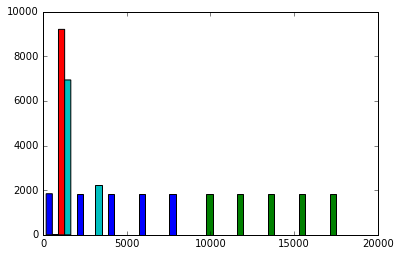

In [119]:
plt.hist(linkage)

In [138]:
fcluster = scipy.cluster.hierarchy.fcluster(linkage, 1)

In [143]:
fcluster.shape

(9205,)

In [146]:
fcluster[10]

3

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b',
  'b'],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 7.0, 7.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 1.0, 1.0, 1.0],
  [0.0, 3.0, 3.0, 1.0],
  [0.0, 4.0, 4.0, 0.0],
  [3.0, 4.0, 4.0, 4.0],
  [0.0, 4.0, 4.0, 4.0],
  [0.0, 5.0, 5.0, 4.0],
  [0.0, 5.0, 5.0, 5.0],
  [0.0, 5.0, 5.0, 5.0],
  [0.0, 8.0, 8.0, 5.0],
  [7.0, 8.0, 8.0, 8.0],
  [0.0, 19.0, 19.0, 8.0],
  [0.0, 23.0, 23.0, 19.0],
  [0.0, 27.0, 27.0, 0.0],
  [23.0, 28.0, 28.0, 27.0],
  [0.0, 29.0, 29.0, 28.0],
  [0.0, 37.0, 37.0, 29.0],
  [0.0, 47.0, 47.0, 37.0]],
 'icoord': [[135.0, 135.

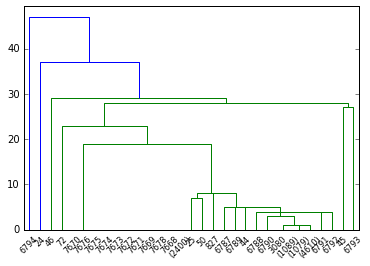

In [151]:
scipy.cluster.hierarchy.dendrogram(linkage, p=15, truncate_mode='level')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 27.0, 27.0, 0.0],
  [0.0, 33.0, 33.0, 27.0],
  [0.0, 7.0, 7.0, 0.0],
  [0.0, 9.0, 9.0, 7.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0,

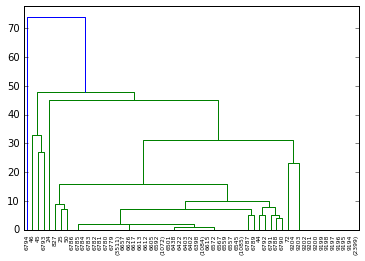

In [152]:
linkage_complete = scipy.cluster.hierarchy.linkage(dist_pdist, method='complete')
scipy.cluster.hierarchy.dendrogram(linkage_complete, p=15, truncate_mode='level')

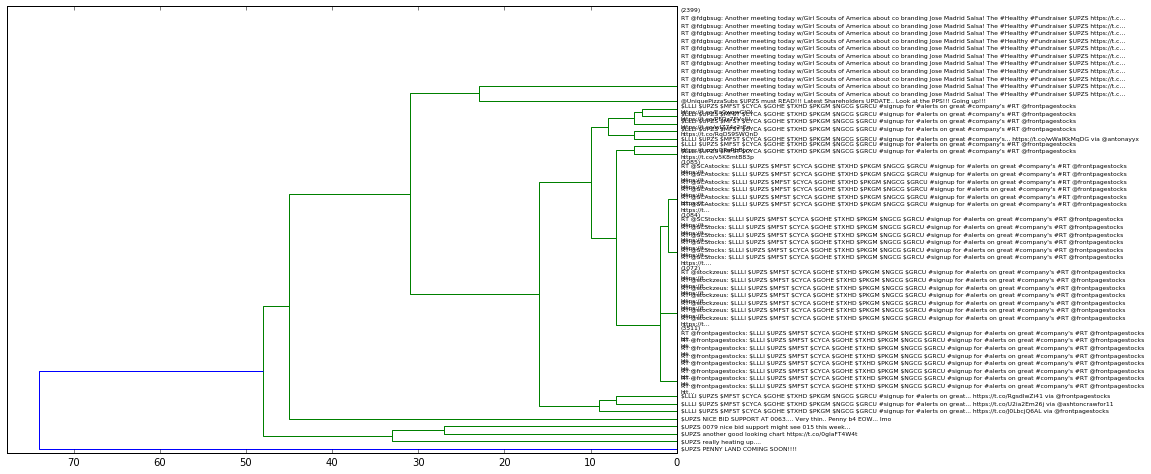

In [161]:
linkage_complete_dendrogram = scipy.cluster.hierarchy.dendrogram(linkage_complete,
    p=15, truncate_mode='level', orientation='left', labels=[x['text'] for x in s200s])

In [184]:
s200s[0]['created_at']

'Wed May 04 23:49:51 +0000 2016'

In [207]:
from textblob import TextBlob



In [214]:
sentiment = []
for tweet in s200s:
    text= tweet['user']['description']
    blob = TextBlob(text)
    total_sentiment = 0
    for sentence in blob.sentences:
        total_sentiment += sentence.sentiment.polarity
    sentiment.append(total_sentiment)


In [210]:
[1,2,3].reverse()

In [215]:
sentiment.reverse()

In [216]:
cumulative = numpy.cumsum(sentiment)

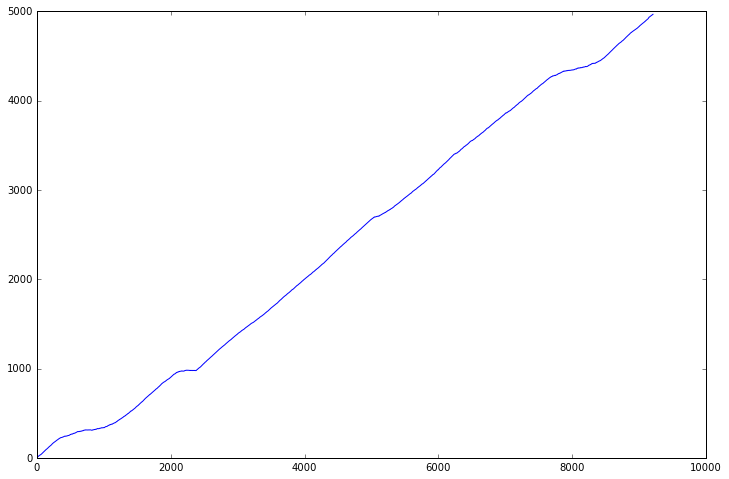

In [217]:
plt.plot([i for i in range(len(s200s))], cumulative)

In [186]:
created_at = [datetime.datetime.strptime(x['created_at'], '%a %b %d %H:%M:%S +0000 %Y') for x in s200s]

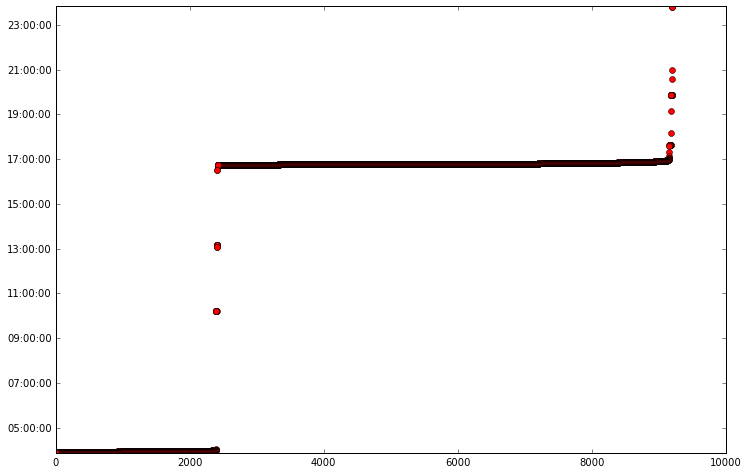

In [190]:
plt.plot([len(created_at) - i for i in range(len(created_at))], created_at, 'ro')

In [188]:
matplotlib.rcParams['figure.figsize'] = [12, 8]

In [171]:
unique_user_descriptions = [k for k, v in { x['user']['description'] : 1 for x in s200s }.items()]
distud = numpy.zeros(shape=[len(unique_user_descriptions), len(unique_user_descriptions)], dtype=numpy.int8)
print(len(unique_user_descriptions))
for i in range(len(unique_user_descriptions)):
    if i % 1000 == 0:
        print(datetime.datetime.now())
        print(i)
    w1 = set([w for w in unique_user_descriptions[i].split(" ")])
    lenw1 = len(w1)
    for j in range(i, len(unique_user_descriptions)):
        w2 = set([w for w in unique_user_descriptions[j].split(" ")])
        lenw2 = len(w2)
        distud[i, j] = distud[j, i] = int(100 * (1.0 - words_in_common_sets(w1, w2, lenw1, lenw2)))

distud_pdist = numpy.zeros(shape=[int(len(unique_user_descriptions) * (len(unique_user_descriptions) - 1) / 2)], dtype=numpy.int8)
k = 0
for i in range(len(unique_user_descriptions)):
    for j in range(i+1, len(unique_user_descriptions)):
        distud_pdist[k] = distud[i, j]
        k += 1

2490
2016-05-05 11:13:43.310971
0
2016-05-05 11:14:34.084974
1000
2016-05-05 11:14:58.257778
2000


In [172]:
linkage_ud_complete = scipy.cluster.hierarchy.linkage(distud_pdist, method='complete')

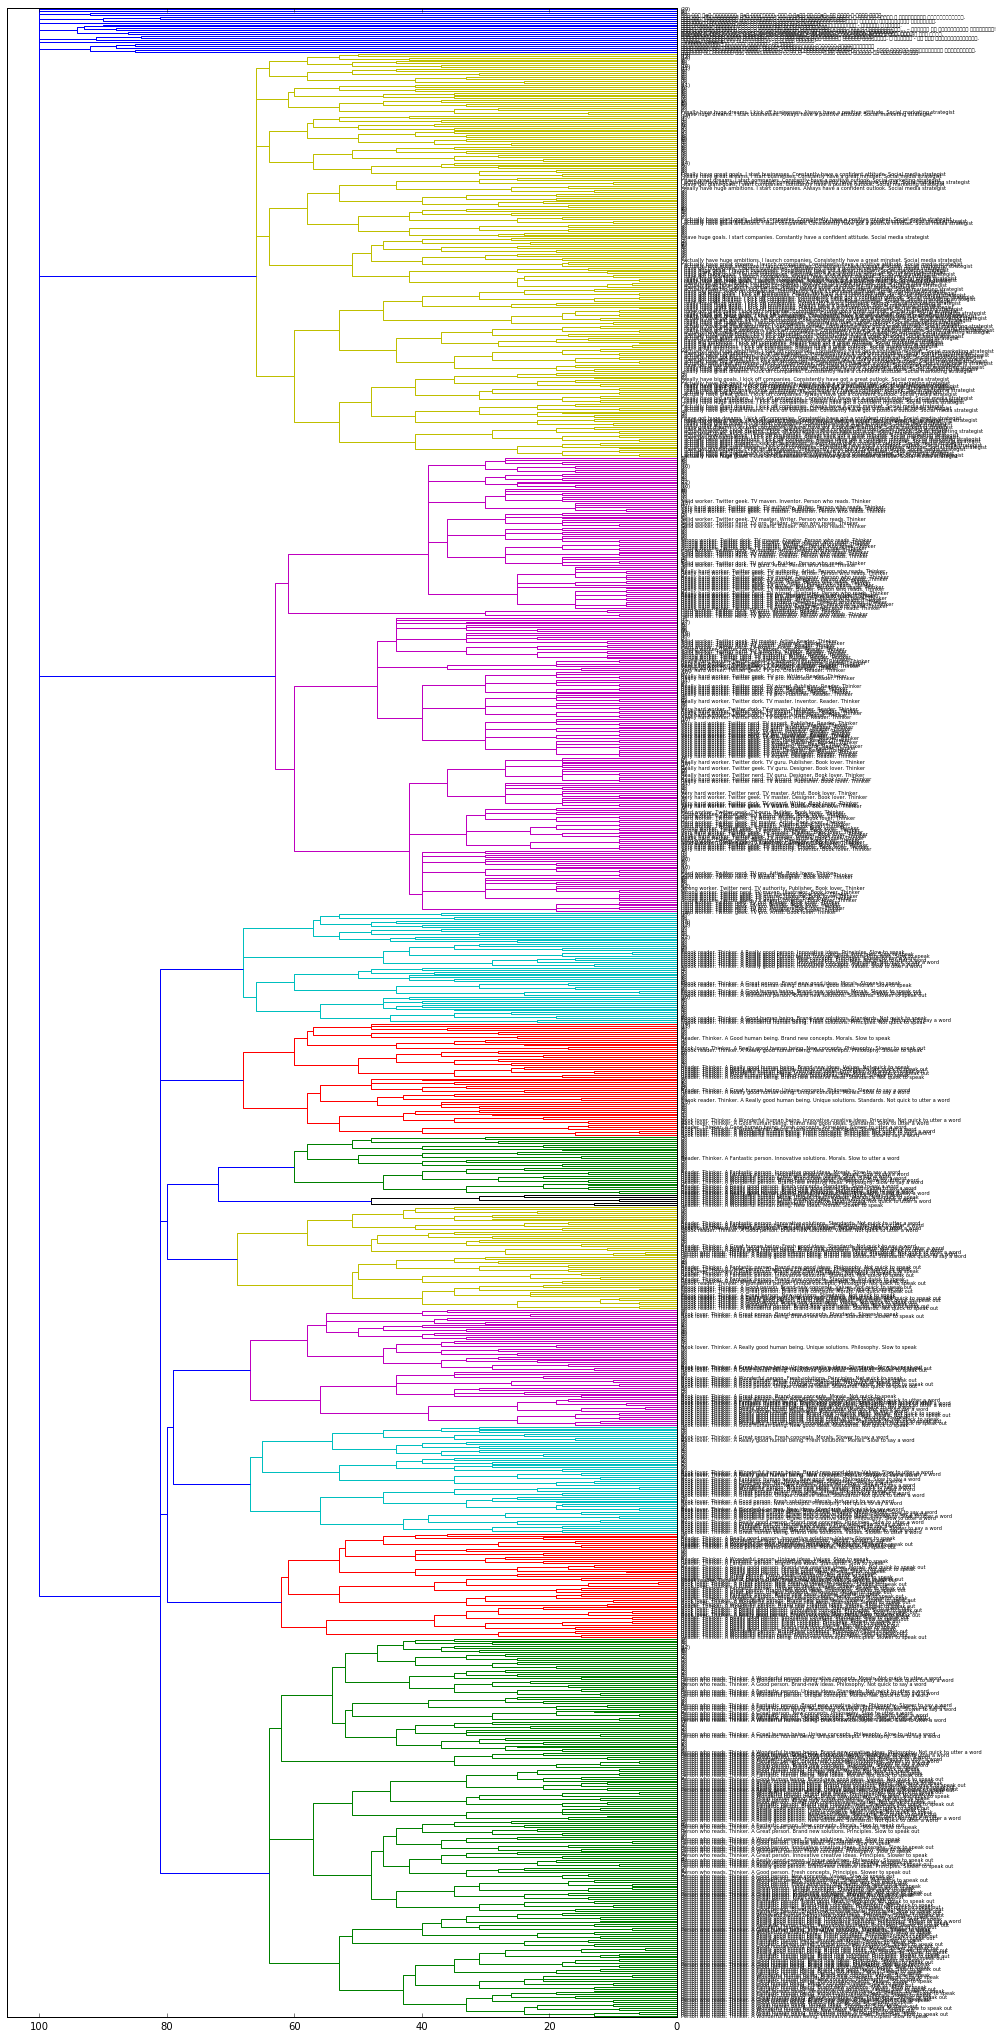

In [180]:
user_description_dendrogram = scipy.cluster.hierarchy.dendrogram(linkage_ud_complete, 
    p=10, truncate_mode='level', orientation='left', labels=unique_user_descriptions)

In [97]:
with open("upzs_tweets.pickle", "wb") as f:
    pickle.dump(s200s, f)

In [58]:
len({x['id'] : 1 for y in s200googen for x in y['statuses']})

3494

In [79]:
len({x['text'][0:50] : 1 for y in s200goog for x in y['statuses']})

2228

In [83]:
len({x['user']['screen_name'] : 1 for y in s200goog for x in y['statuses']})

1518

In [91]:
len({x['text'][0:100] : 1 for y in s200 for x in y['statuses']})

17

AttributeError: 'str' object has no attribute 'substring'

In [65]:
ls

access_token_secret.txt     api_secret.txt          sample_subscribe.py
access_token.txt            README.md               search_stock_tweets.py
analyze_stock_tweets.ipynb  runsample.sh*           secrets.json
api_key.txt                 sample_stock_tweets.py  Untitled.ipynb


In [56]:
3714/52

71.42307692307692

In [45]:
ids = [x['id'] for x in s200goog['statuses']]
(min(ids), max(ids))

(727601105299865602, 727626956938739712)

In [43]:
len(s200goog2['statuses'])

80

In [44]:
ids = [x['id'] for x in s200goog2['statuses']]
(min(ids), max(ids))

(727568575683276800, 727601105299865602)

In [32]:
len(s200['statuses'])

100

In [13]:
len(Out[12])

2

In [14]:
Out[12].__class__

twitter.api.TwitterDictResponse

In [20]:
s = Out[12]

In [21]:
s2 = Out[18]

In [27]:
sns = {}
for sn in [x['user']['screen_name'] for x in s['statuses']]:
    print(sn)
    sns[sn] = t.statuses.user_timeline(screen_name=sn)
    print(len(sns[sn]))
    

aldwingg
20
ieronimkovalev
20
tihonovaneona
20
gurevninel
20
terentevagelena
20
seleznevakarin1
20
morozovradii1
20
trifontitov1
20
severyanalekse3
20
sazonovavrorii1
20
kulikovgemell
20
vahtangpestov
20
veroniyadavydo3
20
vikentiyajukov1
20
bobylevafeokti2
20


In [29]:
[(x['created_at'], x['text']) for x in sns['bobylevafeokti2']]

[('Tue May 03 00:43:59 +0000 2016',
  'RT @CarCrashesTV: Mega Crash – Horrible Accident 15 MN – Car crash compilation hard #9 | (Do not Watch) 2015 https://t.co/1CSTJRub2q https:…'),
 ('Tue May 03 00:27:45 +0000 2016',
  'RT @CarCrashesTV: Bad Car Crashes Caught on camera 2014 Early 2015 – TOP 50 #6 https://t.co/4IXWirLB8i https://t.co/J76DeCnUhk'),
 ('Tue May 03 00:13:35 +0000 2016',
  'RT @CarCrashesTV: Car Crashes in America USA &amp; Road Rage 2015 # 6 https://t.co/xsayippWEN https://t.co/CkEUJScKme'),
 ('Tue May 03 00:02:04 +0000 2016',
  'RT @StylishRentals: Check out this vacation rental House I found in Fort Lauderdale! https://t.co/CskdrKGHG6 #travel via @vrbo https://t.co…'),
 ('Tue May 03 00:02:02 +0000 2016',
  'RT @JabberEtsy: Mothers day gift | Night Light | Nautical Decor | Beach Decor | Ocean Art | Beach.. https://t.co/1hzXSDKkH9 https://t.co/j3…'),
 ('Mon May 02 23:57:15 +0000 2016',
  'RT @CarCrashesTV: Mid Air Plane Crash New York City United Airlines vs Trans World 

In [36]:
[(x['user']['screen_name'], x['created_at'], x['text']) for x in s200['statuses']]

[('kulikovgemell',
  'Tue May 03 02:39:37 +0000 2016',
  'RT @SCAstocks: $GRCU $UPZS $MFST $CYCA $GOHE $TXHD $PKGM $NGCG $LLLI #signup for #alerts on great #companys #RT @frontpagestocks\nhttps://t.…'),
 ('bobylevafeokti2',
  'Tue May 03 02:39:21 +0000 2016',
  'RT @SCAstocks: $GRCU $UPZS $MFST $CYCA $GOHE $TXHD $PKGM $NGCG $LLLI #signup for #alerts on great #companys #RT @frontpagestocks\nhttps://t.…'),
 ('frolovailiana',
  'Tue May 03 02:39:17 +0000 2016',
  'RT @SCAstocks: $GRCU $UPZS $MFST $CYCA $GOHE $TXHD $PKGM $NGCG $LLLI #signup for #alerts on great #companys #RT @frontpagestocks\nhttps://t.…'),
 ('hohlovsvetozar2',
  'Tue May 03 02:39:16 +0000 2016',
  'RT @SCAstocks: $GRCU $UPZS $MFST $CYCA $GOHE $TXHD $PKGM $NGCG $LLLI #signup for #alerts on great #companys #RT @frontpagestocks\nhttps://t.…'),
 ('gromovsamuil',
  'Tue May 03 02:39:14 +0000 2016',
  'RT @SCAstocks: $GRCU $UPZS $MFST $CYCA $GOHE $TXHD $PKGM $NGCG $LLLI #signup for #alerts on great #companys #RT @frontpagestock

In [30]:
[(x['created_at'], x['text'], x['user']['screen_name']) for x in s['statuses']]

[('Tue May 03 00:23:54 +0000 2016',
  'RT @PopsyCakes: Make mom feel extra special this year w/the gift of a #MothersDay PopsyCakes!! 5 Unique flavors 2 choose from! $UPZS https:…',
  'aldwingg'),
 ('Tue May 03 00:10:14 +0000 2016',
  'RT @SCStocks: $GRCU $UPZS $MFST $CYCA $GOHE $TXHD $PKGM $NGCG $LLLI #signup for #alerts on great #companys #RT @frontpagestocks\nhttps://t.c…',
  'ieronimkovalev'),
 ('Mon May 02 21:49:02 +0000 2016',
  'RT @SCStocks: $GRCU $UPZS $MFST $CYCA $GOHE $TXHD $PKGM $NGCG $LLLI #signup for #alerts on great #companys #RT @frontpagestocks\nhttps://t.c…',
  'tihonovaneona'),
 ('Mon May 02 21:48:50 +0000 2016',
  'RT @SCStocks: $GRCU $UPZS $MFST $CYCA $GOHE $TXHD $PKGM $NGCG $LLLI #signup for #alerts on great #companys #RT @frontpagestocks\nhttps://t.c…',
  'gurevninel'),
 ('Mon May 02 21:48:32 +0000 2016',
  'RT @SCStocks: $GRCU $UPZS $MFST $CYCA $GOHE $TXHD $PKGM $NGCG $LLLI #signup for #alerts on great #companys #RT @frontpagestocks\nhttps://t.c…',
  'terentevag

In [19]:
len(Out[18]['statuses'])

15

In [3]:
#t = twitter.Twitter(auth=twitter.OAuth(keycodes["access_token"],
#                                        keycodes["access_token_secret"],
#                                        keycodes["consumer_key"],
#                                        keycodes["consumer_secret"]))
twitter_stream = twitter.TwitterStream(auth=twitter.OAuth(keycodes["access_token"],
                                                    keycodes["access_token_secret"],
                                                    keycodes["consumer_key"],
                                                    keycodes["consumer_secret"]))


In [51]:
iterator = twitter_stream.statuses.sample()

i = 0
j = 0
k = 0
f = []
for tweet in iterator:
    i += 1
    try:
        if stocksymbol.search(tweet["text"]):
            k += 1
            f += [tweet]
            print(str(datetime.now()) + " " + tweet["text"])
        j += 1
        if j > 100000 or k > 10:
            break
    except KeyError:
        pass
iterator.close()

2015-12-26 01:34:35.905205 BIEI Premier Biomedical, Inc. Shares
https://t.co/0A9gjboTDF

$BIEI $IJH $AAPL $PMCB #BIEI #finance #invest
2015-12-26 01:37:32.876493 CUM.TO Copper Mountain Mining Corp. Financials
https://t.co/YKiCQMxIA0

$CUM.TO $EWZ $VRSN $PCI #CUM.TO #share #invest
2015-12-26 01:40:32.825293 Wells Fargo downgraded by Vetr Inc. to hold. $57.01 PT. https://t.co/rGqD3x6qrC $WFC #WFC
2015-12-26 01:46:08.956804 MTUM iShares MSCI USA Momentum Factor ETF 52Wk High
https://t.co/VMDQTZYCfU

$MTUM $XLU $BAC $DWTI #MTUM #pennystocks #finance
2015-12-26 01:57:47.827529 RT @ChiStocks: $ECOB News Dec. 22
https://t.co/lReYFeKmmi
2015-12-26 01:58:36.960761 $JNPR Filings Updated Saturday, December 26, 2015 01:10:57 AM $JNK $IWM $JNK $XLV https://t.co/vnvTtRMqHH
2015-12-26 01:59:21.790324 Chelsea Counsel Company Has $1,497,000 Stake in Rockwell Automation $ROK https://t.co/x4PVaE7GF3
2015-12-26 02:03:22.845738 RT @GlendaRosen: #USAD - entitles @Arrayit $ARYC to an exclusive license to com

In [47]:
tweet["text"]

'RT @ChiStocks: $ECOB News Dec. 22\nhttps://t.co/lReYFeKmmi'

In [36]:
import re

In [40]:
stocksymbol = re.compile("\s\$[A-Z]")

In [41]:
for x in f:
    try:
        if stocksymbol.search(x["text"]):
            print(x["text"])
    except KeyError:
        pass

In [33]:
f

[{'delete': {'status': {'id': 299721381921308673,
    'id_str': '299721381921308673',
    'user_id': 359749180,
    'user_id_str': '359749180'},
   'timestamp_ms': '1451109756188'}},
 {'delete': {'status': {'id': 310918693028761600,
    'id_str': '310918693028761600',
    'user_id': 364052812,
    'user_id_str': '364052812'},
   'timestamp_ms': '1451109756151'}},
 {'delete': {'status': {'id': 295616060080680962,
    'id_str': '295616060080680962',
    'user_id': 359749180,
    'user_id_str': '359749180'},
   'timestamp_ms': '1451109756201'}},
 {'delete': {'status': {'id': 680628487997251584,
    'id_str': '680628487997251584',
    'user_id': 4628792173,
    'user_id_str': '4628792173'},
   'timestamp_ms': '1451109756248'}},
 {'delete': {'status': {'id': 292175447326851072,
    'id_str': '292175447326851072',
    'user_id': 359749180,
    'user_id_str': '359749180'},
   'timestamp_ms': '1451109756234'}},
 {'delete': {'status': {'id': 279730318217474050,
    'id_str': '279730318217474050

In [1]:
import json

In [9]:
tweet

{'delete': {'status': {'id': 680612377696452609,
   'id_str': '680612377696452609',
   'user_id': 2446581252,
   'user_id_str': '2446581252'},
  'timestamp_ms': '1451106992584'}}

In [17]:
iterator.close()

In [18]:
twitter_stream.timeout

In [ ]:
t.statuses.home_timeline()